# Random sampling

https://numpy.org/doc/1.16/reference/routines.random.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Simple random data

### Discrete Uniform Distribution

https://numpy.org/doc/1.16/reference/generated/numpy.random.randint.html

[3 0 3 0 3 3 0 0 0 1 1 0 4 0 3 0 4 1 3 2 4 3 2 2 2 0 4 4 4 3 0 2 1 2 1 4 4
 2 1 4 3 3 1 3 4 3 4 0 2 1 1 0 3 3 0 1 4 3 4 4 3 1 2 2 0 3 2 3 2 0 4 0 1 4
 3 0 3 1 2 1 1 1 3 0 2 1 1 2 2 2 0 2 2 0 0 0 4 4 3 4]


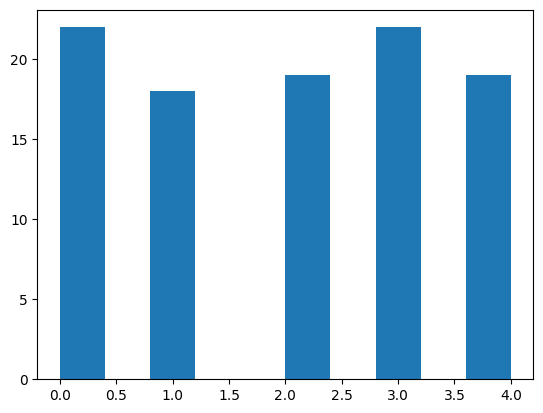

In [2]:
# Return random integers from low (inclusive) to high (exclusive)

random_objects = np.random.randint(low=0, high=5, size=100)
print(random_objects)

plt.hist(random_objects)

plt.show()
plt.close()

### Uniform Distribution

https://numpy.org/doc/1.16/reference/generated/numpy.random.uniform.html

\begin{align}
p(x) = \frac{1}{b -a}
\end{align}


s:  (1000,) [0.02570987 0.30673711 0.32318316 0.88573008 0.36035635 0.03761301
 0.72124247 0.68954807 0.49335665 0.41644012]
mean:  0.490418175115536
width:  1
height:  1.0
area:  1.0


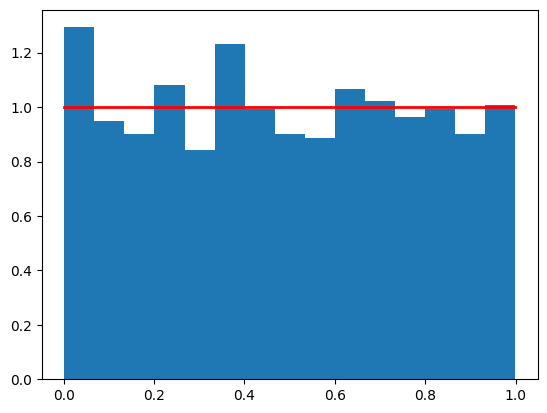

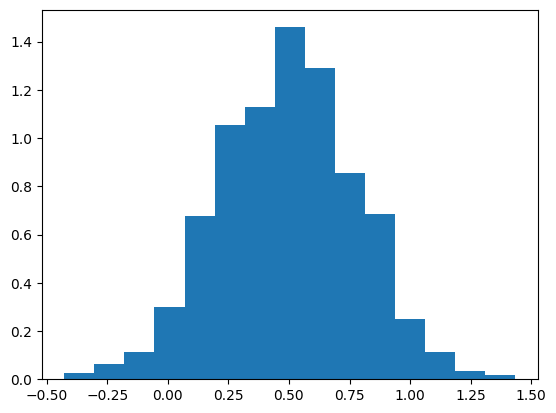

In [3]:
b, a = 1, 0 # high, low
s = np.random.uniform(low=a, high=b, size=1000)
print('s: ', s.shape, s[0:10])
print('mean: ', np.mean(s))

count, bins, ignored = plt.hist(s, 15, density=True)

# Probability density function (PDF) for the uniform distribution
pdf_values = np.ones_like(bins) / (b - a)  # Using the formula for the PDF

# area under the curve equals 1
width = b - a
height = 1/(b - a)
area = width * height
print('width: ', width)
print('height: ', height)
print('area: ', area)

plt.plot(bins, pdf_values, linewidth=2, color='r')
plt.show()
plt.close()

data_normal = np.random.normal(loc=np.mean(s), scale=np.std(s), size=1000)
count, bins, ignored = plt.hist(data_normal, 15, density=True)

plt.show()
plt.close()

### Choice

https://numpy.org/doc/1.16/reference/generated/numpy.random.choice.html

p : 1-D array-like, optional <br>
The probabilities associated with each entry in a. If not given the sample assumes a uniform distribution over all entries in a.

In [4]:
print("Choose 2 values from 0 to 4: ", np.random.choice(5, size=2))
print("Choose 2 values from the list: ", np.random.choice(["Gyan", "is", "the", "great"], size=2))
print("Choose 2 values from 0 to 1 without replacement: ", np.random.choice(2, size=2, replace=False))

elements = ['one', 'two', 'three']
weights = [0.2, 0.3, 0.5]
print("Choose elements with probabilities: ", np.random.choice(elements, p=weights))

Choose 2 values from 0 to 4:  [2 2]
Choose 2 values from the list:  ['Gyan' 'is']
Choose 2 values from 0 to 1 without replacement:  [1 0]
Choose elements with probabilities:  three


## Distributions

https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html#distributions

### Binomial

https://numpy.org/doc/1.16/reference/generated/numpy.random.binomial.html
https://www.w3schools.com/python/numpy/numpy_random_binomial.asp

Binomial Distribution is a Discrete Distribution.<br>
It describes the outcome of binary scenarios, e.g. toss of a coin, it will either be head or tails.<br>

It has three parameters:<br>
n - number of trials.<br>
p - probability of occurence of each trial (e.g. for toss of a coin 0.5 each).<br>
size - The shape of the returned array.

(10000,)
[7 2 5 ... 6 5 3]
Sum of freq:  999.6


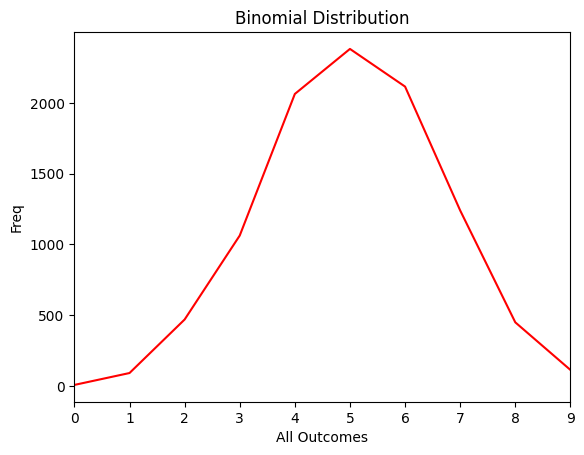

In [5]:
# Draw samples from a binomial distribution.

# number of trials, probability of success for each trial, size
trials, probability, test = 10, .5, 10000
outcomes = np.random.binomial(trials, probability, test)
print(outcomes.shape)
print(outcomes)

all_outcome = range(trials)
freq = np.zeros(trials)
for outcome in all_outcome:
    for a_outcome in outcomes:
        if outcome == a_outcome:
            freq[outcome] += 1

print("Sum of freq: ", np.mean(freq))

plt.plot(all_outcome, freq, 'r')
plt.title("Binomial Distribution")
plt.xlabel('All Outcomes')
plt.ylabel('Freq')
plt.xlim([0, trials-1])
plt.show()

In [6]:
# Decide between 2 outcomes randomly

if np.random.binomial(1, 0.5) == 1:
    print("Success :)")
else:
    print("Fail :(")

Fail :(


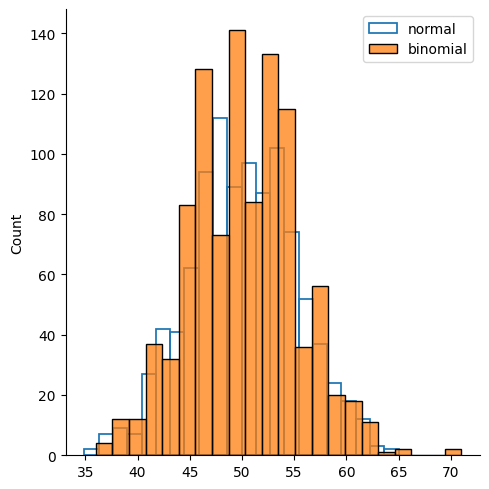

In [7]:
# Difference Between Normal and Binomial Distribution
# The main difference is that normal distribution is continous whereas binomial is discrete,
# but if there are enough data points it will be quite similar to normal distribution with certain loc and scale.

data_normal = np.random.normal(loc=50, scale=5, size=1000)
data_binomial = np.random.binomial(n=100, p=0.5, size=1000)

# Plot both distributions on the same graph
sns.displot(data_normal, label='normal', fill=False)
sns.histplot(data_binomial, label='binomial', kde=False)  # Use kde=False to omit the kernel density plot

# Add legend
plt.legend()

# Show the plot
plt.show()

### Normal (Guassian) Distribution

https://numpy.org/doc/1.16/reference/generated/numpy.random.normal.html

\begin{align}
p(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} }
\end{align}

It has three parameters:<br>
loc (mean/ peak of the bell)<br>
scale (standard deviation/ flatness of the graph)<br>
size (shape of the returned array).<br>

Most of these graphs tend to be bell curved shape. It is continous.
The normal distributions occurs often in nature.

[-0.09777061 -0.03475465 -0.14522023 -0.01866973  0.05441169 -0.12911375
 -0.12585593  0.22416379 -0.11332598 -0.1312398 ]
True
True
min:  -0.3168894886206808
max:  0.35498710033207165


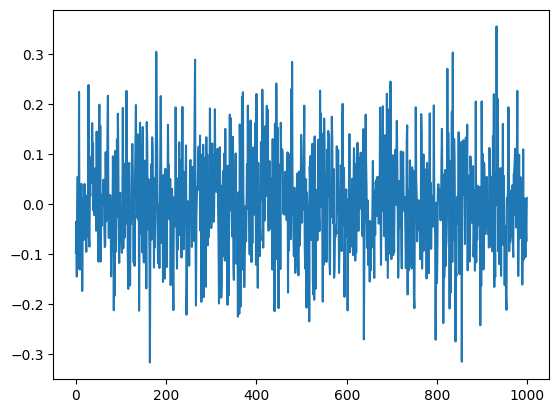

count:  (30,) [0.08930211 0.04465106 0.08930211 0.13395317 0.58046374 0.6251148
 0.75906797 1.20557854 1.96464652 2.5004592  2.76836555 3.21487612
 3.39348035 4.33115255 4.50975678 3.92929303 2.8130166  3.08092295
 2.36650603 1.74139123 1.29488066 0.84837009 1.16092749 0.49116163
 0.40185951 0.04465106 0.08930211 0.13395317 0.         0.04465106]
bins:  (31,) [-0.31688949 -0.2944936  -0.27209772 -0.24970183 -0.22730594 -0.20491006
 -0.18251417 -0.16011828 -0.1377224  -0.11532651 -0.09293063 -0.07053474
 -0.04813885 -0.02574297 -0.00334708  0.01904881  0.04144469  0.06384058
  0.08623646  0.10863235  0.13102824  0.15342412  0.17582001  0.1982159
  0.22061178  0.24300767  0.26540356  0.28779944  0.31019533  0.33259121
  0.3549871 ]


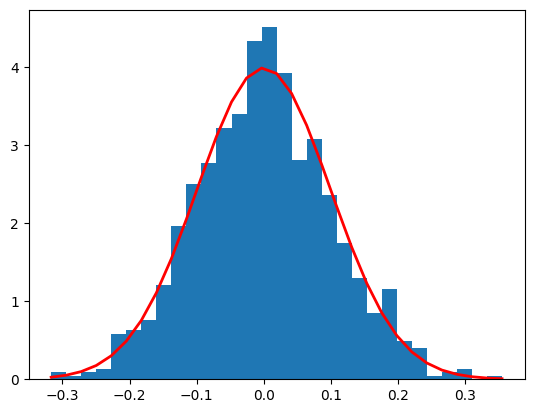

In [8]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

print(s[0:10])

print(abs(mu - np.mean(s)) < 0.01)
print(abs(sigma - np.std(s, ddof=1)) < 0.01)

print('min: ', np.min(s))
print('max: ', np.max(s))

plt.plot(s)
plt.show()
plt.close()

count, bins, ignored = plt.hist(s, bins=30, density=True)
print('count: ', count.shape, count)
print('bins: ', bins.shape, bins)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()
plt.close()